In [2]:
import pandas as pd
import numpy as np

## 1. Data Import & Processing

In [13]:
import pandas as pd

FY_15 = pd.read_csv('DATA/PERM_Disclosure_Data_FY15.csv', encoding='latin1')
FY_16 = pd.read_csv('DATA/PERM_Disclosure_Data_FY16.csv', encoding='latin1')
FY_17 = pd.read_csv('DATA/PERM_Disclosure_Data_FY17.csv', encoding='latin1')
FY_18 = pd.read_csv('DATA/PERM_Disclosure_Data_FY18.csv', encoding='latin1')
FY_19 = pd.read_csv('DATA/PERM_Disclosure_Data_FY19.csv', encoding='latin1')
FY_20 = pd.read_csv('DATA/PERM_Disclosure_Data_FY20.csv', encoding='latin1')
FY_21 = pd.read_csv('DATA/PERM_Disclosure_Data_FY21.csv', encoding='latin1')
FY_22 = pd.read_csv('DATA/PERM_Disclosure_Data_FY22.csv', encoding='latin1')
FY_23 = pd.read_csv('DATA/PERM_Disclosure_Data_FY23.csv', encoding='latin1')
FY_24 = pd.read_csv('DATA/PERM_Disclosure_Data_FY24.csv', encoding='latin1')

/var/folders/n4/wzs319lj251f2qslt0l8_8n40000gn/T/ipykernel_33781/2973109337.py:3: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  FY_15 = pd.read_csv('DATA/PERM_Disclosure_Data_FY15.csv', encoding='latin1')
/var/folders/n4/wzs319lj251f2qslt0l8_8n40000gn/T/ipykernel_33781/2973109337.py:4: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  FY_16 = pd.read_csv('DATA/PERM_Disclosure_Data_FY16.csv', encoding='latin1')
/var/folders/n4/wzs319lj251f2qslt0l8_8n40000gn/T/ipykernel_33781/2973109337.py:5: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  FY_17 = pd.read_csv('DATA/PERM_Disclosure_Data_FY17.csv', encoding='latin1')
/var/folders/n4/wzs319lj251f2qslt0l8_8n40000gn/T/ipykernel_33781/2973109337.py:6: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  FY_18 = pd.re

### Column Mismatch

In [20]:
import pandas as pd

# List of DataFrames and their names
dfs = {
    "FY_15": FY_15,
    "FY_16": FY_16,
    "FY_17": FY_17,
    "FY_18": FY_18,
    "FY_19": FY_19,
    "FY_20": FY_20,
    "FY_21": FY_21,
    "FY_22": FY_22,
    "FY_23": FY_23,
    "FY_24": FY_24
}

# Get all unique column names
all_columns = set()
for df in dfs.values():
    all_columns.update(df.columns)

# Fixing the issue by using a proper mapping function

# Convert index to a list explicitly
column_presence = pd.DataFrame(index=sorted(all_columns), columns=dfs.keys())

# Mark presence with '✓' and absence with '✗' correctly
for name, df in dfs.items():
    column_presence[name] = ['✓' if col in df.columns else '✗' for col in column_presence.index]

column_presence.to_csv("pd_show.csv")



In [15]:
df_temp = [FY_15, FY_16, FY_17, FY_18, FY_19, FY_20, FY_21, FY_22, FY_23, FY_24]
column_mapping = {
    'CASE_RECEIVED_DATE': 'RECEIVED_DATE'
}
for i in range(len(df_temp)):
    df_temp[i].rename(columns=column_mapping, inplace=True)
df_combined = pd.concat(df_temp, ignore_index=True)


In [16]:
df_combined['DECISION_DATE'] = pd.to_datetime(df_combined['DECISION_DATE'], format='mixed')
df_combined['RECEIVED_DATE'] = pd.to_datetime(df_combined['RECEIVED_DATE'], format='mixed')
df_combined['Year'] = df_combined['DECISION_DATE'].dt.year
df_combined['WAIT_TIME'] = (df_combined['DECISION_DATE'] - df_combined['RECEIVED_DATE']).dt.days
df_combined.to_csv('COMBINED_DATA.csv')

/var/folders/n4/wzs319lj251f2qslt0l8_8n40000gn/T/ipykernel_33781/1095600130.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_combined['Year'] = df_combined['DECISION_DATE'].dt.year
/var/folders/n4/wzs319lj251f2qslt0l8_8n40000gn/T/ipykernel_33781/1095600130.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_combined['WAIT_TIME'] = (df_combined['DECISION_DATE'] - df_combined['RECEIVED_DATE']).dt.days


## 2. Visualize the Yearly Trend & Distributions

In [3]:
df_combined = pd.read_csv('COMBINED_DATA.csv')

/var/folders/n4/wzs319lj251f2qslt0l8_8n40000gn/T/ipykernel_33781/2201576169.py:1: DtypeWarning: Columns (6,7,17,62,63,101,119,123,125,126,127,128,129,130) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.read_csv('COMBINED_DATA.csv')


In [17]:
df_combined['Year'].value_counts()

Year
2016.0    124579
2018.0    119358
2021.0    118096
2023.0    115357
2019.0    102879
2022.0    102838
2015.0     97181
2020.0     93923
2017.0     90967
2024.0     67421
2014.0     18445
Name: count, dtype: int64

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


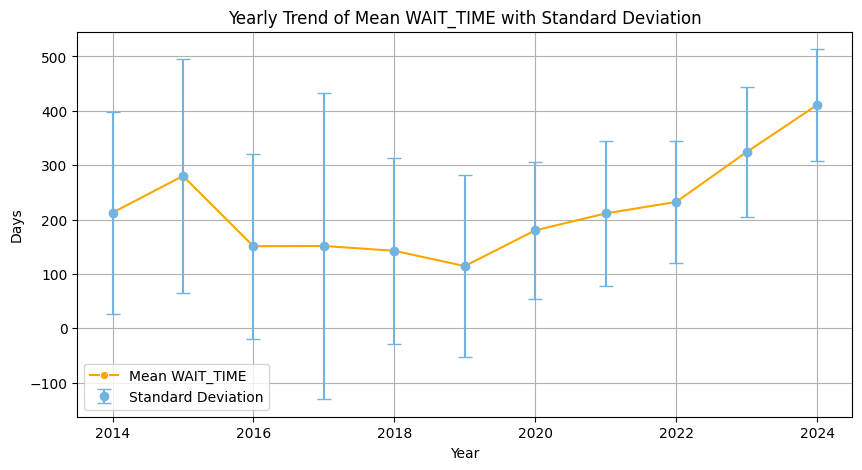

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaN values in 'Year' and 'WAIT_TIME' to avoid issues
df_filtered = df_combined.dropna(subset=['Year', 'WAIT_TIME'])

# Compute mean and standard deviation for each year
yearly_stats = df_filtered.groupby('Year')['WAIT_TIME'].agg(['mean', 'std']).dropna()

# Plot with error bars
plt.figure(figsize=(10, 5))

# Use seaborn to plot mean with standard deviation as error bars
sns.lineplot(x=yearly_stats.index, y=yearly_stats['mean'], marker='o', label='Mean WAIT_TIME', color='#FFA500')
plt.errorbar(yearly_stats.index, yearly_stats['mean'], yerr=yearly_stats['std'], fmt='o', color='#72B3E0', capsize=5, label='Standard Deviation')

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Days")
plt.title("Yearly Trend of Mean WAIT_TIME with Standard Deviation")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
